In [1]:
import pandas as pd, numpy as np

In [2]:
#Lets read the dataset into the dataframe 'loan_status'
loan_status = pd.read_csv('loan.csv')

C:\Users\Radhe Krishan\AppData\Local\Temp\ipykernel_5816\20617207.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_status = pd.read_csv('loan.csv')


In [3]:
#Lets see the first few lines of the dataset
loan_status.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Lets check the shape of the loan_status dataframe
loan_status.shape

(39717, 111)

In [5]:
#Lets get more information on the columns datatype and the number of missing values they contain
loan_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
#It seems that that the dataframe has null values.lets see the number of missing values per column
loan_status.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
#Lets create a copy of loan_status dataframe into a new dataframe 'loan' so that the use 
#of inplace function doesnt affect the 'loan_status' datafame

loan = loan_status

In [8]:
#Lets check the shape of the new dataframe 'loan'
loan.shape

(39717, 111)

In [9]:
#Handling missong values

#There are 39717 rows in the dataframe and we can see that some columns has same number of missing|NA
#values. Lets remove the columns which contain all missing values 'NA'

loan.dropna(axis=1,how='all',inplace=True)

In [10]:
#Lets check the 'loan' dataframe size now
loan.shape

(39717, 57)

In [11]:
#So, many columns containing all missing values have been removed. Lets check how count of  missing 
#values per column

loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [12]:
#Handling missong values

# We can see above, there are three columns which still have high NA values
#Lets drop these columns as it may impact our analysis

loan.drop(columns=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],inplace=True)

In [13]:
#Lets check the dataframe size now
loan.shape

(39717, 54)

In [14]:
#Lets check the columns with missing values

loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### There are different variables /columns in the dataset which we dont require in our final analysis

There are several variables which are generated once the loan is approved, these are called
    #customer behavioural variables. As in our case, the loan is accepted, so, we dont need to
    #analyze these variables

    #There columns are:
    delinq_2yrs
    inq_last_6mths  
    revol_bal
    revol_util
    out_prncp
    out_prncp_inv  
    total_pymnt    
    total_pymnt_inv
    total_rec_prncp
    total_rec_int
    earliest_cr_line
    total_rec_late_fee
    recoveries
    collection_recovery_fee
    last_pymnt_d
    last_pymnt_amnt
    last_credit_pull_d
    
Lets remove them

In [15]:
loan.drop(columns=['delinq_2yrs','inq_last_6mths','revol_bal','revol_util','out_prncp','out_prncp_inv',
                   'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
                    'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d',
                    'last_pymnt_amnt','last_credit_pull_d','earliest_cr_line'],inplace=True)
loan.shape

(39717, 37)

In [16]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

There are still many columns which are useless for our analysis<br>
id, member_id - which contain only unique values<br>
emp_title - contains 2459 null values and useless for the analysis<br>
url, desc, title, zip_code - These columns are useless for the analysis<br>

Lets drop all these columns

In [17]:
loan.drop(columns=['id', 'member_id','emp_title','url','desc','title','zip_code'],inplace=True)
loan.shape

(39717, 30)

In [18]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [19]:
#Lets remove the columns which contain single values and useless for our analysis

loan.drop(columns=['pymnt_plan','initial_list_status','policy_code','application_type',
                    'acc_now_delinq','delinq_amnt'], inplace=True)

In [20]:
loan.shape

(39717, 24)

In [21]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [22]:
#Futher the below columns are useless for the analysis
#collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens

loan.drop(columns=['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],inplace=True)

In [23]:
#Lets see the number of columnns and if anyone of them still contains missing values
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

In [24]:
#So, we have 22 columns now. lets check the columns with missing values
loan.isna().sum().sort_values(ascending=False)

emp_length              1075
pub_rec_bankruptcies     697
verification_status        0
total_acc                  0
pub_rec                    0
open_acc                   0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
loan_amnt                  0
funded_amnt                0
home_ownership             0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt_inv            0
annual_inc                 0
dtype: int64

### Handling missing values

In [25]:
#Lets check the distribution of unique values in 'emp_length' column

loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [26]:
#Replacing NA value with mode of the column may impact the analysis

#Replacing the missing values in 'emp_length' with 'Unknown'

loan['emp_length'].fillna('Not Available',inplace=True)

In [27]:
#Lets check the count of missing values in 'emp_length' column, it should be 0

loan.emp_length.isnull().sum()

0

In [28]:
#Lets check the null for the column 'pub_rec_bankruptcies'

loan[loan.pub_rec_bankruptcies.isnull()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
35006,15000,15000,14875.000000,36 months,8.94%,476.58,A,A5,< 1 year,MORTGAGE,...,Not Verified,Sep-09,Fully Paid,credit_card,NY,7.07,6,0,19,NaN
35058,3000,3000,2988.236621,36 months,14.26%,102.92,C,C5,3 years,MORTGAGE,...,Not Verified,Sep-09,Fully Paid,credit_card,TX,14.97,13,0,23,NaN
35362,4000,4000,3892.258856,36 months,11.14%,131.22,B,B1,< 1 year,MORTGAGE,...,Not Verified,Aug-09,Charged Off,car,MI,11.08,14,0,33,NaN
38443,2300,2300,589.605658,36 months,13.17%,77.69,D,D2,10+ years,RENT,...,Verified,Aug-08,Fully Paid,moving,NJ,2.26,4,0,13,NaN
38717,6000,6000,500.000000,36 months,8.00%,188.02,A,A3,< 1 year,MORTGAGE,...,Not Verified,May-08,Fully Paid,other,OH,16.08,16,0,39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.000000,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,13,0,40,NaN
39713,8500,8500,875.000000,36 months,10.28%,275.38,C,C1,3 years,RENT,...,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,6,0,9,NaN
39714,5000,5000,1325.000000,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,11,0,20,NaN
39715,5000,5000,650.000000,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,Not Verified,Jul-07,Fully Paid,other,MD,3.72,17,0,26,NaN


In [29]:
#'pub_rec_bankruptcies' column contains 697 missing values

#Lets check the distribution of unique values in this column
loan['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [30]:
loan['pub_rec_bankruptcies'].mode()[0]

0.0

In [31]:
#Lets fill NA values in 'pub_rec_bankruptcies' columns

loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies'].mode()[0])

In [32]:
#Lets check the cunt of unique values in 'pub_rec_bankruptcies' column now.
loan['pub_rec_bankruptcies'].value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [33]:
loan['pub_rec_bankruptcies'].isnull().sum()

0

In [34]:
#Lets check the count of unique values per column

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            39717 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

In [35]:
#Lets check if there are any duplicated row in the dataset

loan.duplicated().sum()   #There are not duplictae rows

0

### Standardising Values (chnage the variables to correct types)



In [36]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,3,0,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Source Verified,Dec-11,Charged Off,car,GA,1.00,3,0,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2,0,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Source Verified,Dec-11,Fully Paid,other,CA,20.00,10,0,37,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Source Verified,Dec-11,Current,other,OR,17.94,15,0,38,0.0


In [37]:
#lets check the datatype of each columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            39717 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

In [38]:
#'int_rate' column contains float value but its data type is object

#So, lets check unique values in this column

loan.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

In [39]:
#'%' is the reason for the object data type of 'int_rate' column
#lets remove '%' and format the datatypes of 'int_rate' column to float 

loan['int_rate'] = loan.int_rate.str.replace('%','').astype(float)

In [40]:
#Lets check if datatype has been changed to float or not

loan.int_rate.dtype

dtype('float64')

In [41]:
#Datatype has been changed to float, but lets check the unique values of 'int_rate' column
loan.int_rate.value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

In [42]:
#lets correct the data type of the column 'term'

loan['term'] = loan.term.str.replace(' months','').astype(int)

In [43]:
#Lets check the datatype of term column

loan.term.dtype

dtype('int32')

In [44]:
loan.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,3,0,9,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,Source Verified,Dec-11,Charged Off,car,GA,1.00,3,0,4,0.0


In [45]:
#lets correct the format of the 'issue_d' column which contains date and time
#and is mentioned as of objcet data types

#lets first convert this column to datetime data type

loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')

In [46]:
loan.issue_d.dtype

dtype('<M8[ns]')

In [47]:
#Lets extract year and month iinformation from this column
loan['issue_month'] = pd.to_datetime(loan['issue_d'],format='%b-%y').dt.month
loan['issue_year'] = pd.to_datetime(loan['issue_d'],format='%b-%y').dt.year

In [48]:
loan.shape

(39717, 23)

In [49]:
loan.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,addr_state,dti,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,issue_month,issue_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,Fully Paid,credit_card,AZ,27.65,3,0,9,0.0,12,2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,Charged Off,car,GA,1.00,3,0,4,0.0,12,2011


In [50]:
#lets check the column 'length' unique values
loan.emp_length.value_counts()

10+ years        8879
< 1 year         4583
2 years          4388
3 years          4095
4 years          3436
5 years          3282
1 year           3240
6 years          2229
7 years          1773
8 years          1479
9 years          1258
Not Available    1075
Name: emp_length, dtype: int64

### Filtering Data

In [51]:
loan.shape

(39717, 23)

In [52]:
#Lets check if there are any duplicated row in the dataset

loan.duplicated().sum()   #There are not duplictae rows

0

In [53]:
#Removing rows with loan-status=Current.

#As the applicant with loan_status=current, we neither consider them as defaulter
#nor as no-defaulter. As there is uncertantity, we will not conider this as part of
#our analysis

#Therefore

loan = loan[loan['loan_status']!='Current']
loan.shape

(38577, 23)

In [54]:
#Now, We can see different values in loan_status series
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Identifying and handling outliers/extreme values

In [55]:
loan.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int32
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
open_acc                         int64
pub_rec                          int64
total_acc                        int64
pub_rec_bankruptcies           float64
issue_month                      int64
issue_year                       int64
dtype: object

In [56]:
#lets import pyplot module from matplotlib package

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #ignore warning while using seaborn

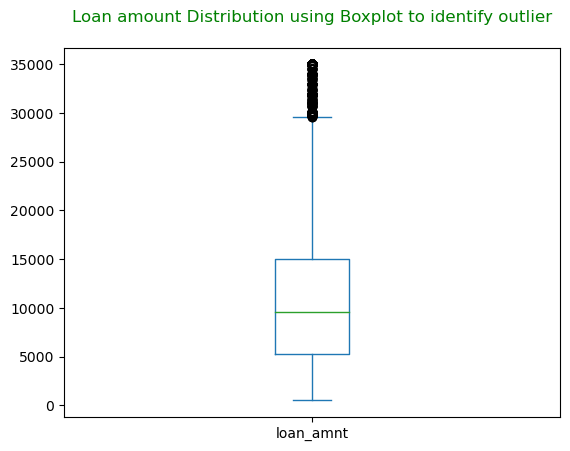

In [57]:
#Lets check if there is any outlier in the 'loan_amnt' column
loan['loan_amnt'].plot.box()

#Adding title
plt.title("Loan amount Distribution using Boxplot to identify outlier\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
plt.show()
#As we can see below that the maximum value is not much greater than the upper fence (around 30k),
#hence, we will not have much impact on the analysis. Hence, we are ignoring these outlier.

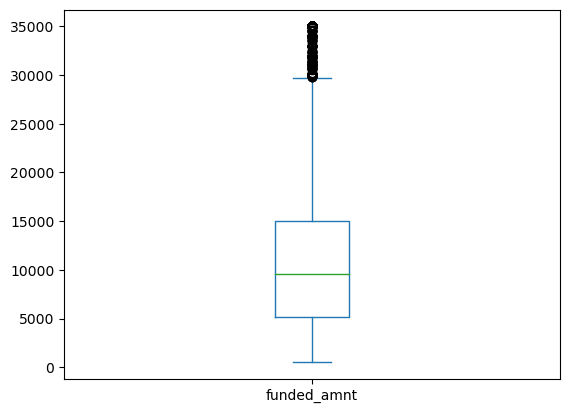

In [58]:
#Lets identify any outlier in funded_amnt column
loan['funded_amnt'].plot.box()
plt.show()
#Maximum value is not much greater than the upper fence (around 30k), hence, we are ignoring these as the outlier.

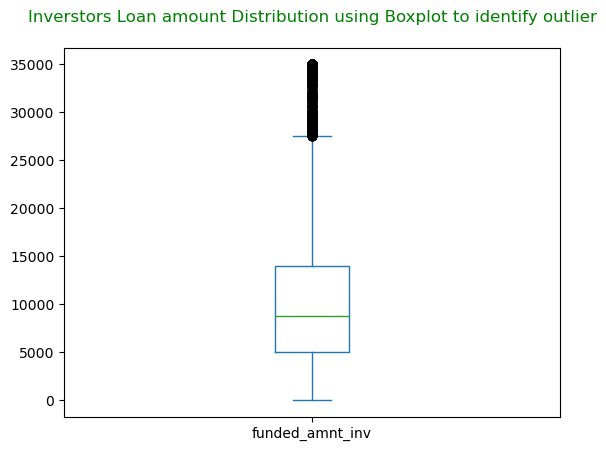

In [59]:
loan['funded_amnt_inv'].plot.box()

#Adding title
plt.title("Inverstors Loan amount Distribution using Boxplot to identify outlier\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
plt.show()
#As we can see below that the maximum value is not much greater than the upper fence (around 27k),
#hence, we will not have much impact on the analysis. Hence, we are ignoring these outlier.

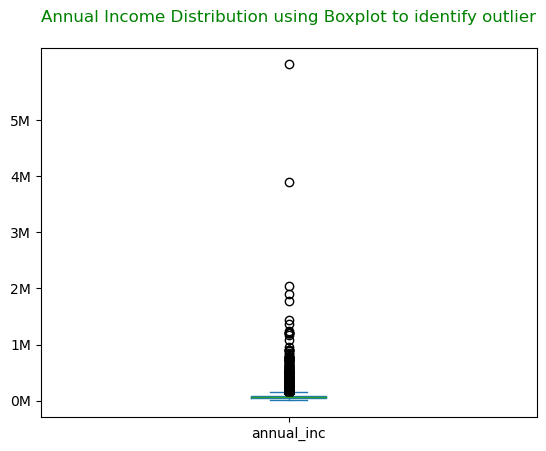

In [60]:
#Lets analyze annual income column

loan['annual_inc'].plot.box()
#Adding title
plt.title("Annual Income Distribution using Boxplot to identify outlier\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})

# Modifying the ticks to show information in (million dollars)
ticks = np.arange(0, 6000000, 1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)
plt.show()

In [61]:
#Clearly, we can see that there are extremen value which are far away from the center box.
#lets use the quantile to identify the distribution of borroweers incomes

loan['annual_inc'].quantile([0.25,0.50,0.75,0.90,0.95,0.96,0.97,0.98,0.99,1])

0.25      40000.0
0.50      58868.0
0.75      82000.0
0.90     115000.0
0.95     140004.0
0.96     150000.0
0.97     165000.0
0.98     187000.0
0.99     234144.0
1.00    6000000.0
Name: annual_inc, dtype: float64

In [62]:
#clearly the outlier. Lets remove these outlier using the below:

annual_inc_25_per = loan['annual_inc'].quantile(0.25)
annual_inc_75_per = loan['annual_inc'].quantile(0.75)
IQR = annual_inc_75_per - annual_inc_25_per
lower_fence = annual_inc_25_per - 1.5 * IQR
upper_fence = annual_inc_75_per + 1.5 * IQR

In [63]:
loan = loan[(loan['annual_inc'] >= lower_fence) & (loan['annual_inc'] <= upper_fence)]

In [64]:
loan.shape

(36815, 23)

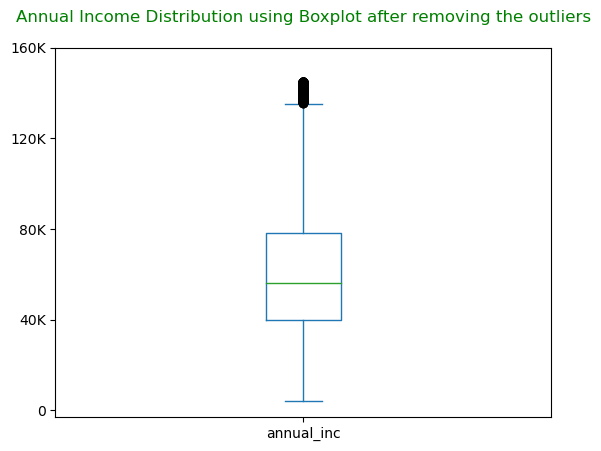

In [65]:
#Lets analyze annual income column again for the updated loan

loan['annual_inc'].plot.box()
#Adding title
plt.title("Annual Income Distribution using Boxplot after removing the outliers\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
# Modifying the ticks to show information in (million dollars)
ticks = np.arange(0, 200000, 40000)
labels = ["{}K".format(i//1000) if i!=0 else 0 for i in ticks]
plt.yticks(ticks, labels)
plt.show()

#The below box chart looks fine for the analysis.

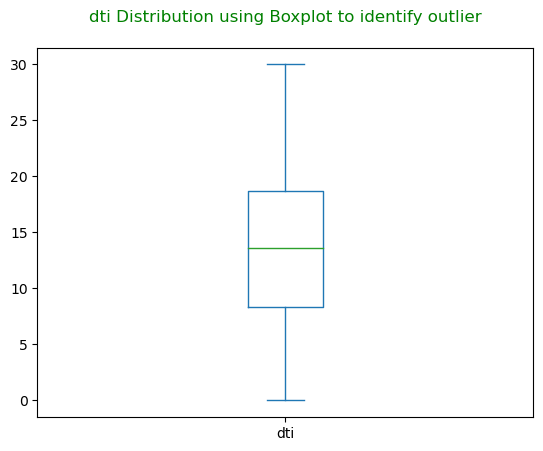

In [66]:
#Lets check if there is any outlier in the 'dti' column
plt.title("dti Distribution using Boxplot to identify outlier\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
loan['dti'].plot.box()
plt.show()

#looks fine, there is no outlier.

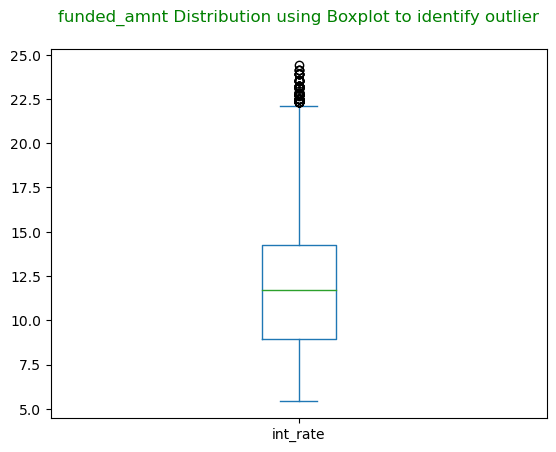

In [67]:
#Lets check if there is any outlier in the 'funded_amnt' column
plt.title("funded_amnt Distribution using Boxplot to identify outlier\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
loan['int_rate'].plot.box()
plt.show()

#The upper fence is around '22%'. The extreme values are not far away from the upper fence.
#Hence, it willn't have much impact on the analysis. We are ignoring them as the outliers.

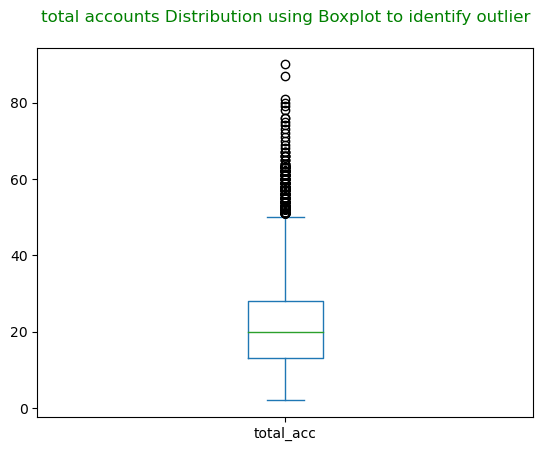

In [68]:
plt.title("total accounts Distribution using Boxplot to identify outlier\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
loan['total_acc'].plot.box()
plt.show()

In [69]:
#to be considered
loan['total_acc'].quantile([0.25,0.50,0.75,0.90,0.95,0.96,0.97,0.98,0.99,1])

0.25    13.0
0.50    20.0
0.75    28.0
0.90    37.0
0.95    43.0
0.96    44.0
0.97    47.0
0.98    50.0
0.99    55.0
1.00    90.0
Name: total_acc, dtype: float64

In [70]:
loan[loan['total_acc']>55]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,addr_state,dti,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,issue_month,issue_year
219,12000,12000,11975.000000,36,12.42,400.99,B,B4,2 years,RENT,...,Fully Paid,debt_consolidation,CA,11.81,14,0,61,0.0,12,2011
250,4000,4000,4000.000000,36,19.03,146.69,E,E2,10+ years,MORTGAGE,...,Fully Paid,vacation,NC,20.59,30,0,56,0.0,12,2011
403,30000,19825,18614.465570,60,21.28,539.47,F,F2,6 years,MORTGAGE,...,Fully Paid,home_improvement,CT,17.57,17,0,62,0.0,12,2011
734,5000,5000,5000.000000,36,9.91,161.13,B,B1,10+ years,MORTGAGE,...,Fully Paid,debt_consolidation,OH,18.50,19,0,56,0.0,12,2011
751,35000,21825,21825.000000,60,20.30,581.88,E,E5,2 years,MORTGAGE,...,Fully Paid,wedding,NJ,24.71,16,0,61,0.0,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39239,6000,6000,5603.390000,36,7.68,187.14,A,A2,10+ years,OWN,...,Fully Paid,other,NY,2.54,41,0,64,0.0,2,2008
39295,8000,8000,2375.000000,36,9.83,257.50,B,B3,3 years,MORTGAGE,...,Fully Paid,debt_consolidation,MO,21.33,32,0,63,0.0,2,2008
39427,7000,7000,1842.200000,36,7.43,217.52,A,A2,< 1 year,MORTGAGE,...,Fully Paid,other,CA,1.72,42,0,76,0.0,1,2008
39454,18000,18000,814.610000,36,9.33,575.17,B,B3,10+ years,OWN,...,Fully Paid,debt_consolidation,TX,16.95,30,0,63,0.0,1,2008


### Univariate Analysis

In [71]:
loan.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int32
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
open_acc                         int64
pub_rec                          int64
total_acc                        int64
pub_rec_bankruptcies           float64
issue_month                      int64
issue_year                       int64
dtype: object

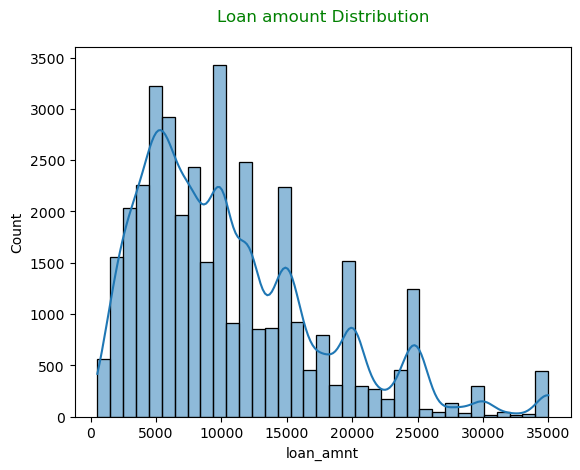

In [72]:
plt.title("Loan amount Distribution\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.histplot(data=loan, x='loan_amnt', bins=35, kde=True)
plt.show()

# As seen, most of the borrowers have taken loan in the range of 5k-10k

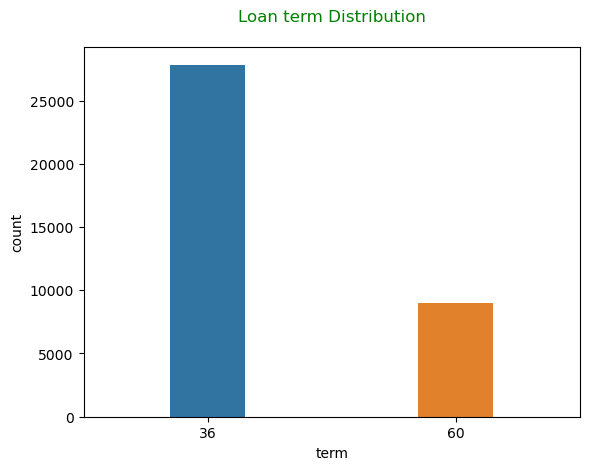

In [73]:
#analyzing loan term
plt.title("Loan term Distribution\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.countplot(data=loan,x='term',width=0.3)
plt.show()

#Most borrowers have taken loan for 36 months

In [74]:
#analyzing int_rate
bin_labels=['6-9','9-12','12-15','15-18','18-21','21-24','24-27']
loan['bins_int_rate'] = pd.cut(loan['int_rate'],bins=[6,9,12,15,18,21,24,27],labels=bin_labels)

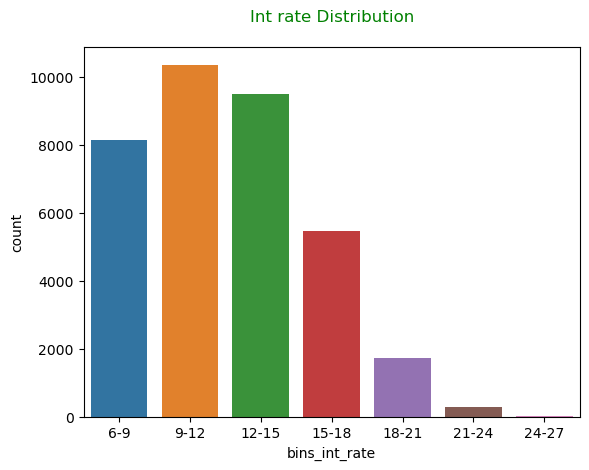

In [75]:
plt.title("Int rate Distribution\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.countplot(data=loan, x='bins_int_rate')
plt.show()
#Most of borrowers have taken the loan with the interest rate from 9-15%

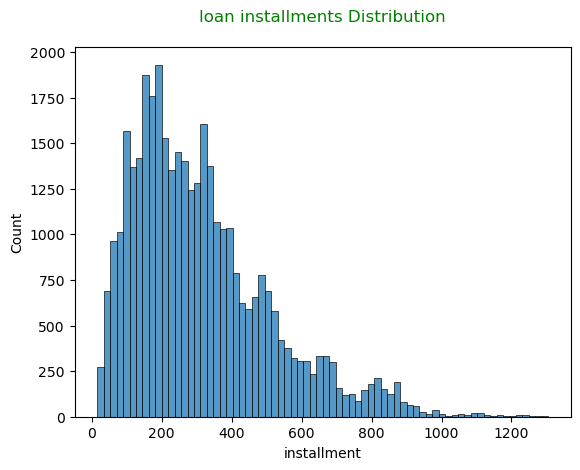

In [76]:
#analyzing installment
plt.title("loan installments Distribution\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.histplot(data=loan, x='installment',bins=70)
plt.show()
#Most of th borrowers opted for the minimum amount for monthly installment

In [77]:
loan['loan_status'].value_counts()

Fully Paid     31384
Charged Off     5431
Name: loan_status, dtype: int64

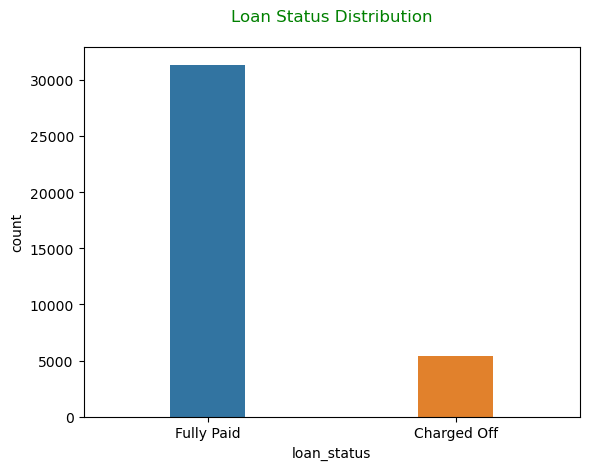

In [78]:
#analyzing loan _status
plt.title("Loan Status Distribution\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.countplot(data=loan, x='loan_status',width=0.3)
plt.show()

#As we can see in the below plot, most of the borrowers have paid the loan.

In [79]:
loan['grade'].value_counts()

B    11152
A     9684
C     7506
D     4856
E     2460
F      890
G      267
Name: grade, dtype: int64

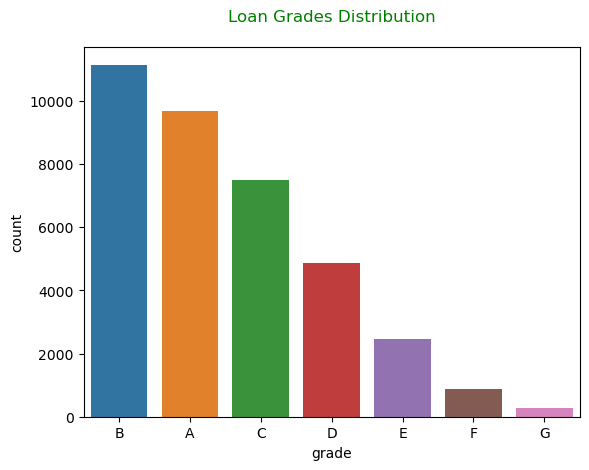

In [80]:
#analyzing loan grades
plt.title("Loan Grades Distribution\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.countplot(data=loan,x='grade',order=loan.grade.value_counts().index)
plt.show()

#Most of the loan are in Grade A and Grade B, hence not risky.
#https://www.lendingclub.com/fileDownload.action?file=Clean_As_Filed_20090730.pdf&type=docs, Page 40

In [81]:
#Lets extract numbers from all sub-grades and all grades have common sungrades from 1,2,3...
loan['sub_grade'] = loan['sub_grade'].apply(lambda x: x[1])

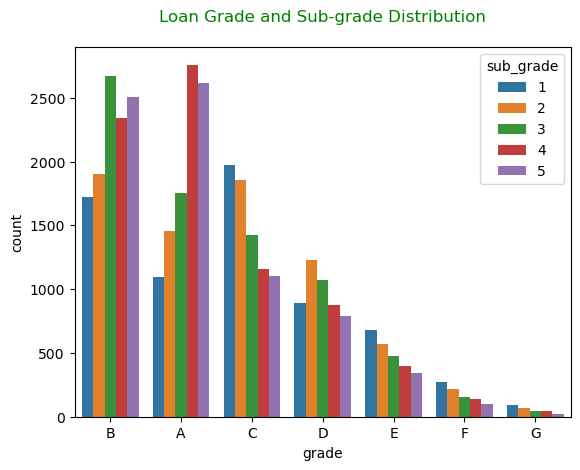

In [82]:
#analyzing loan grade and sub-grades
plt.title("Loan Grade and Sub-grade Distribution\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.countplot(data=loan,x='grade',hue='sub_grade',order=loan.grade.value_counts().index,hue_order=['1','2','3','4','5'])
plt.show()
#Most loans are from subgrades of grade A,B and C

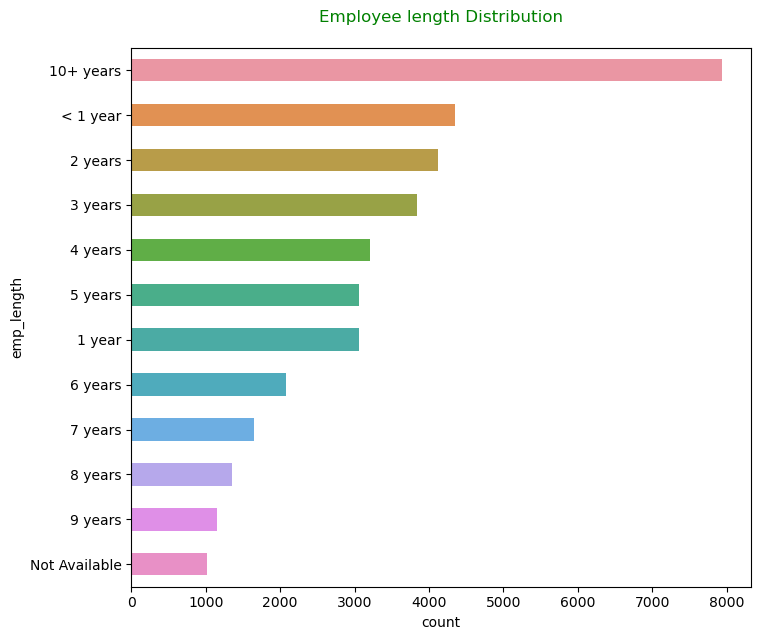

In [83]:
#analyzing employee length
plt.figure(figsize=(8,7))
plt.title("Employee length Distribution\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.countplot(data=loan,y='emp_length',width=0.5,order=loan.emp_length.value_counts().index)
plt.show()

#Borrowers having 10+ years of experience have taken more loan than the others. However, a significant number of borrowers
#have less than 1 years of experience, hence, the bank may pay attention while issuing loan to them.

In [84]:
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

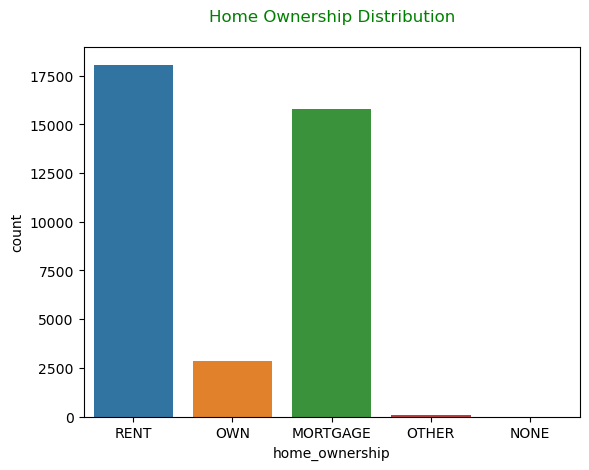

In [85]:
#analyzing home ownership
plt.title("Home Ownership Distribution\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.countplot(data=loan,x='home_ownership')
plt.show()

#As per the plot, most of the borrowers are on Rent or on Mortgage.

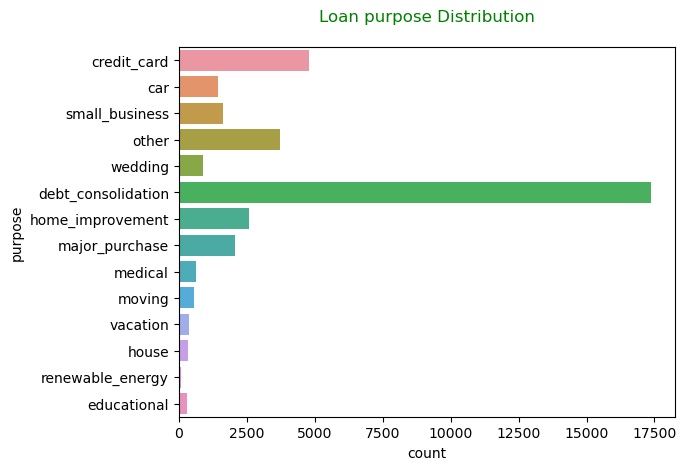

In [86]:
#analyzing loan purpose
plt.title("Loan purpose Distribution\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.countplot(data=loan,y='purpose')
plt.show()

#A sgnificant number of borrowers have opted loan for Debt consolidation.

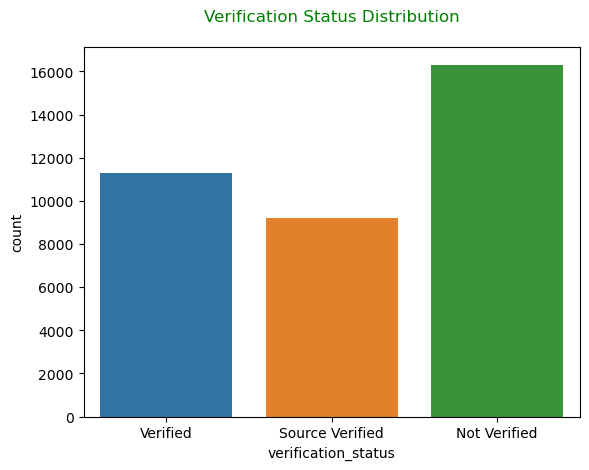

In [87]:
#analyzing verification status
plt.title("Verification Status Distribution\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.countplot(data=loan,x='verification_status')
plt.show()
#Significant no. of loans are not verified.

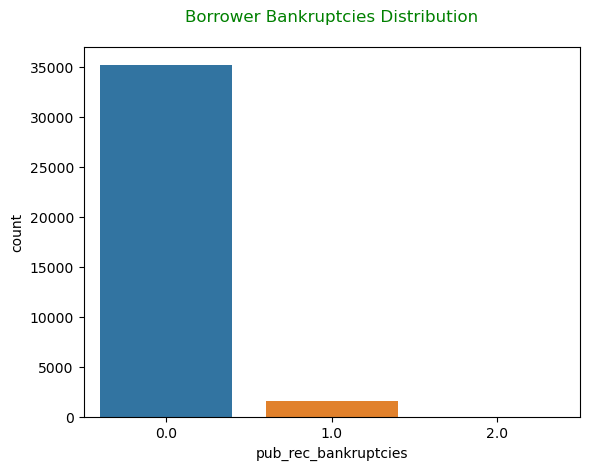

In [88]:
#analyzing bank disruptcies
plt.title("Borrower Bankruptcies Distribution\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.countplot(data=loan,x='pub_rec_bankruptcies')
plt.show()

#Most of the borrowers have no bankruptcies

In [89]:
loan.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int32
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
open_acc                         int64
pub_rec                          int64
total_acc                        int64
pub_rec_bankruptcies           float64
issue_month                      int64
issue_year                       int64
bins_int_rate                 category
dtype: object

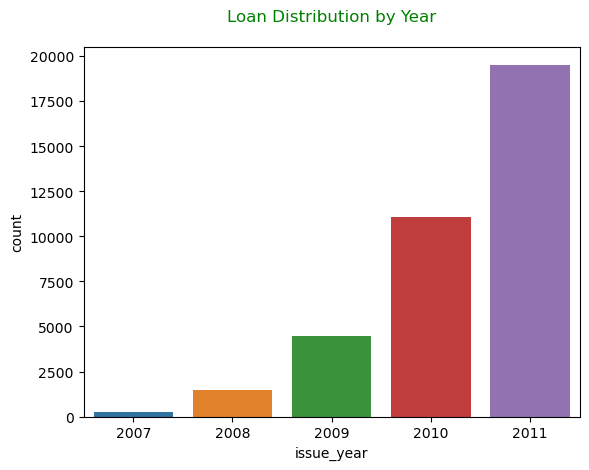

In [90]:
#analyzing loan issue year
plt.title("Loan Distribution by Year\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.countplot(data=loan,x='issue_year')
plt.show()

#The count of issuing loans is increasing with the each year.

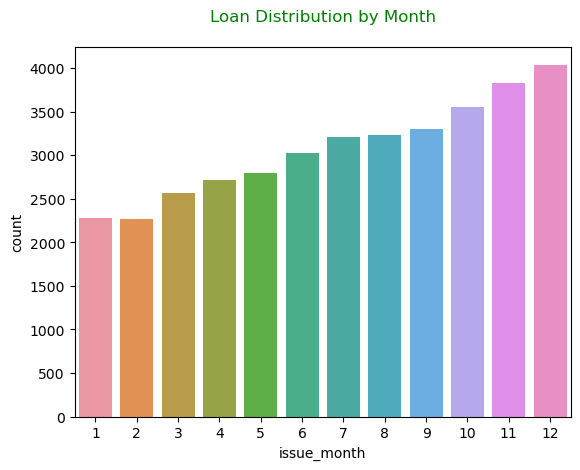

In [91]:
#analyzing loan issue month
plt.title("Loan Distribution by Month\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.countplot(data=loan,x='issue_month')
plt.show()
#more loans were issued in the month of dec

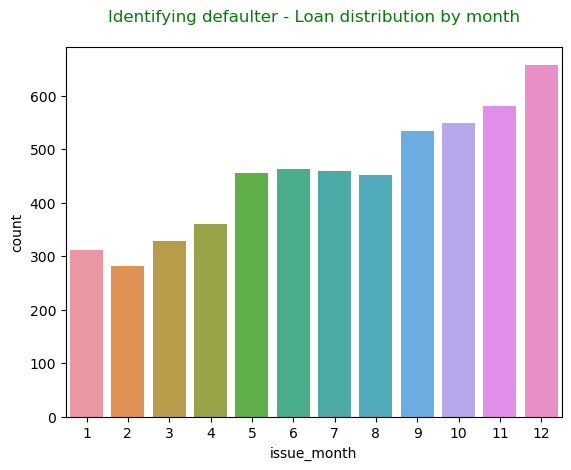

In [92]:
#lets check how many of the defaulters belong to this
plt.title("Identifying defaulter - Loan distribution by month\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.countplot(data=loan[loan['loan_status'] == 'Charged Off'],x='issue_month')
plt.show()

#loans to most of the defaulters was issued in the month of december

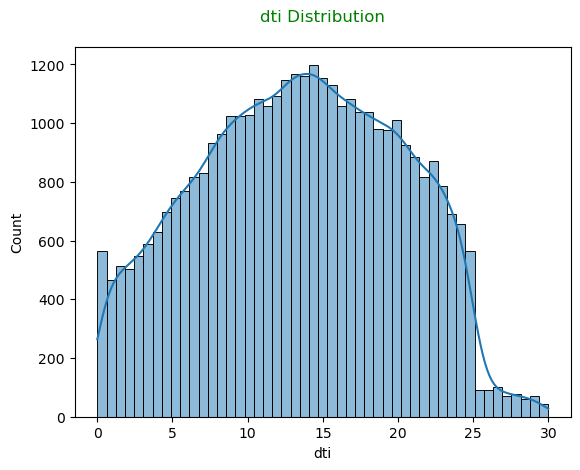

In [93]:
#analyzing dti
plt.title("dti Distribution\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.histplot(data=loan,x='dti',kde=True)
plt.show()

#A large number of borrowers has high debt as compared to their income and may struggle to pay the installment.

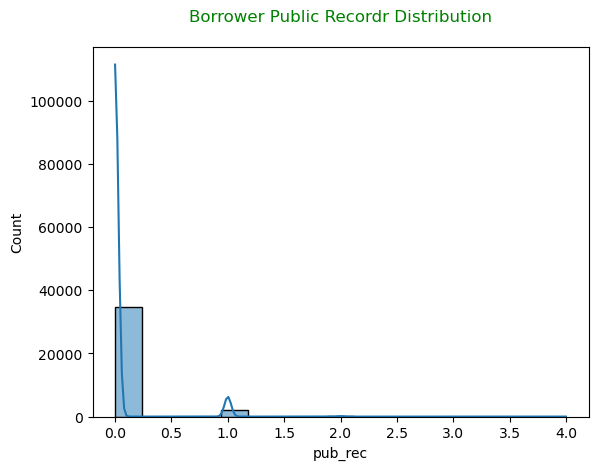

In [94]:
#analyzing Public record
plt.title("Borrower Public Recordr Distribution\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.histplot(data=loan,x='pub_rec',kde=True)
plt.show()
#Most of the borrowers has 0 derogatory public record

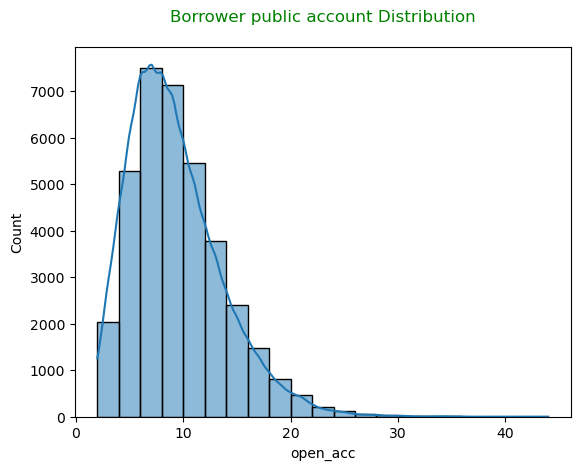

In [95]:
#analyzing open account
plt.title("Borrower public account Distribution\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.histplot(data=loan,x='open_acc',kde=True,binwidth=2,bins=30)
plt.show()
#Most of the borrowers fall in the range of 5-15 open credit lines.

In [96]:
loan.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int32
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
open_acc                         int64
pub_rec                          int64
total_acc                        int64
pub_rec_bankruptcies           float64
issue_month                      int64
issue_year                       int64
bins_int_rate                 category
dtype: object

### Analyzing w.r.t. Loan status 

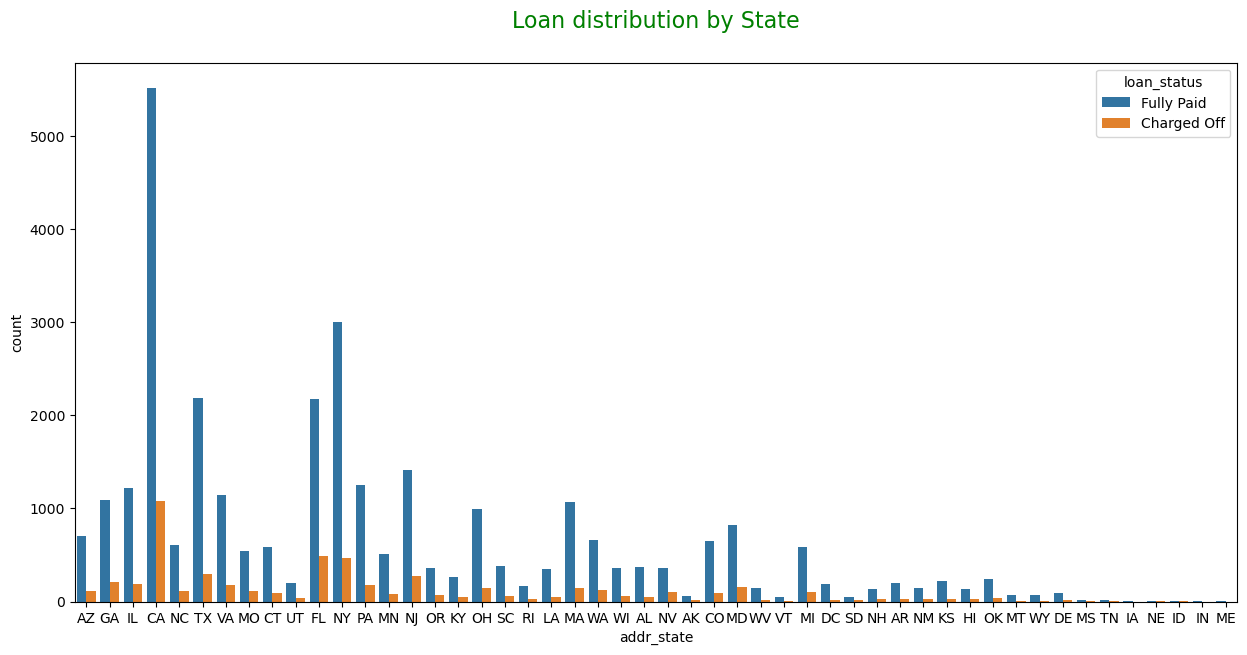

In [97]:
#analzing address state
plt.figure(figsize=(15,7))
plt.title("Loan distribution by State\n", fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
sns.countplot(data=loan,x='addr_state',hue='loan_status')
plt.show()

#As we can see in the plot, california has the most number of defaulted one's.

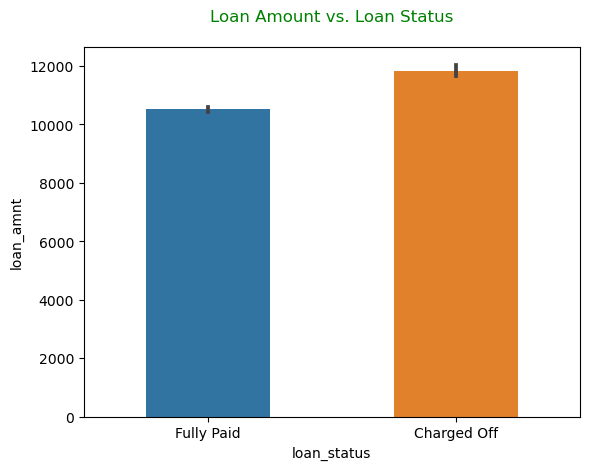

In [98]:
#lets analyze loan_status and loan_amnt
plt.title("Loan Amount vs. Loan Status\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.barplot(data=loan,x='loan_status',y='loan_amnt',width=0.5)
plt.show()

#The borrowers having higher loan amount has higher chances of being a defaulter

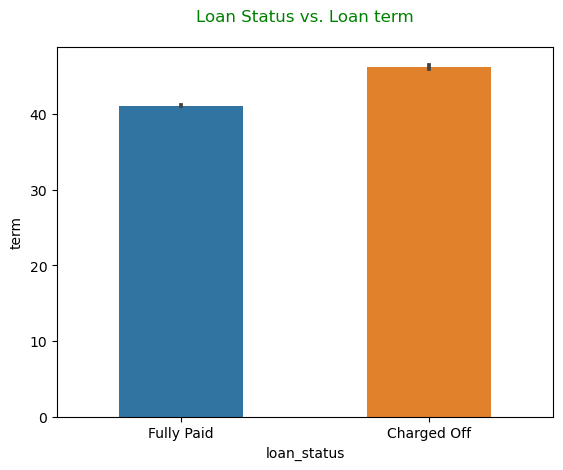

In [99]:
#lets analyze loan_status and term
plt.title("Loan Status vs. Loan term\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.barplot(data=loan,x='loan_status',y='term',width=0.5)
plt.show()
#Borrowers applying for 60 months loan have higher chances of being a defaulter

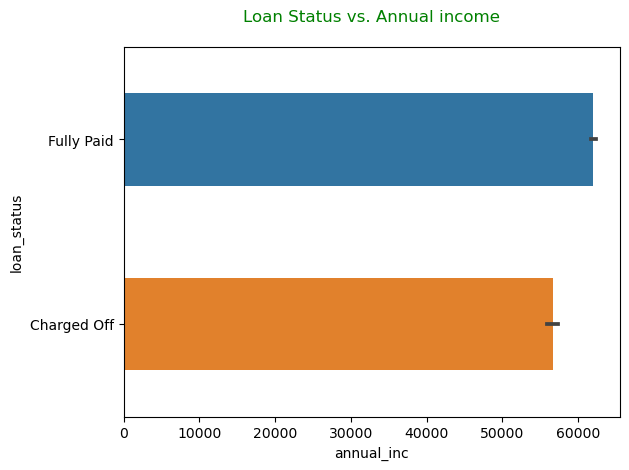

In [100]:
#Loan Status vs. Annual income
plt.title("Loan Status vs. Annual income\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.barplot(data=loan,x='annual_inc',y='loan_status',width=0.5)
plt.show()

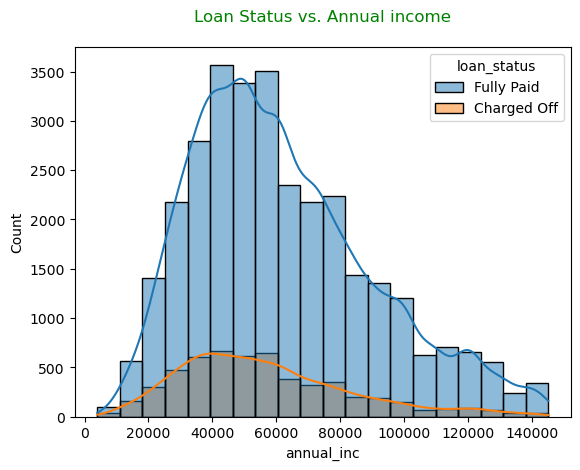

In [101]:
plt.title("Loan Status vs. Annual income\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.histplot(data=loan, x='annual_inc',hue='loan_status',kde=True,bins=20)
plt.show()
#highly number of defaulter had annual income approx. from 35k to 55k. High salary leads to less chances of being a defaulter

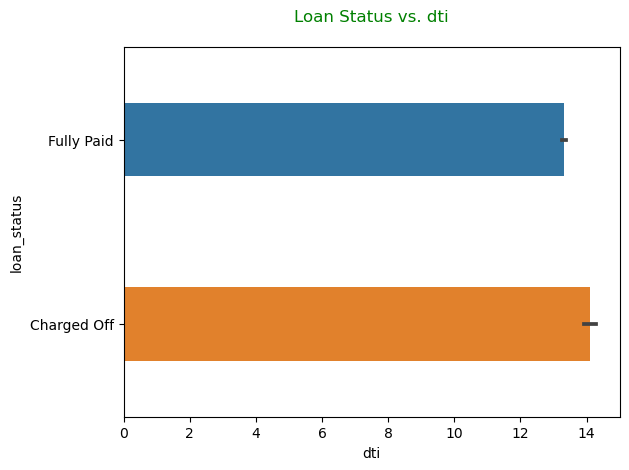

In [102]:
plt.title("Loan Status vs. dti\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.barplot(data=loan,x='dti',y='loan_status',width=0.4)
plt.show()
#The chances of being a default increase with the higher dti

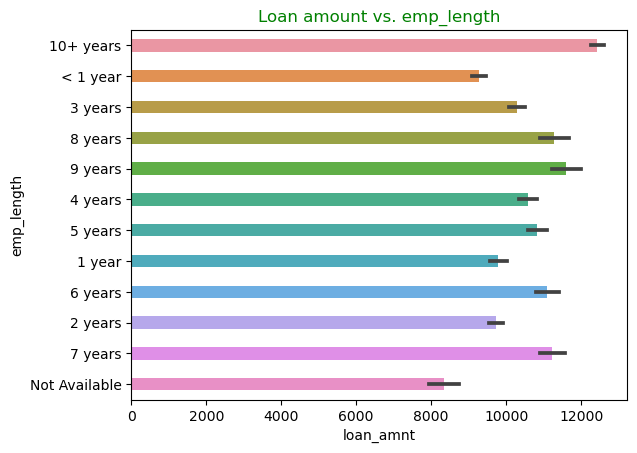

In [103]:
#Loan amount vs. emp_length"
plt.title("Loan amount vs. emp_length", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.barplot(data=loan,x='loan_amnt',y='emp_length',width=0.4)
plt.show()
#emp length having 10+ is offered more loan

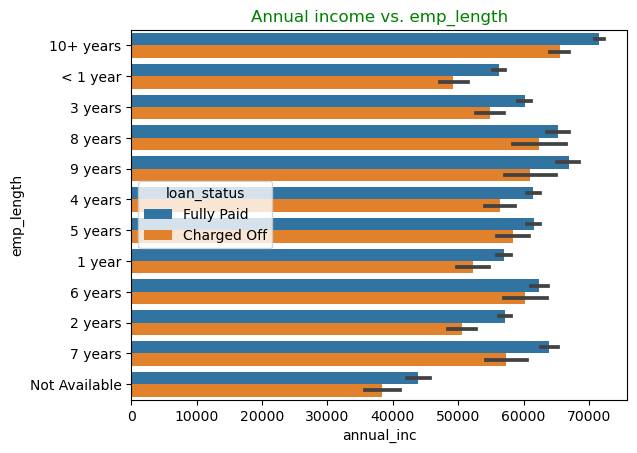

In [104]:
#Annual income vs. emp_length
plt.title("Annual income vs. emp_length", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.barplot(data=loan,x='annual_inc', y='emp_length',hue='loan_status')
plt.show()

#applicant with emp_length of 10+ years have a high chance of being a defaulter.

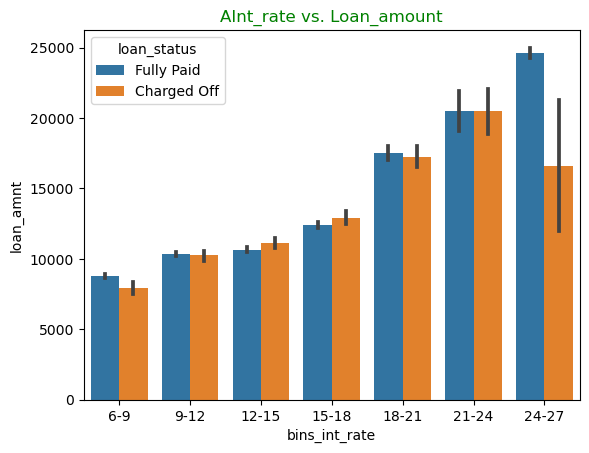

In [105]:
#'bins_int_rate', y='loan_amnt', hue='loan_status')
plt.title("AInt_rate vs. Loan_amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.barplot(data=loan,x='bins_int_rate', y='loan_amnt',hue='loan_status')
plt.show()
#Higher interest rate results in higher number of defaulter

<Axes: title={'center': 'Loan amount vs. Purpose'}, xlabel='loan_amnt', ylabel='purpose'>

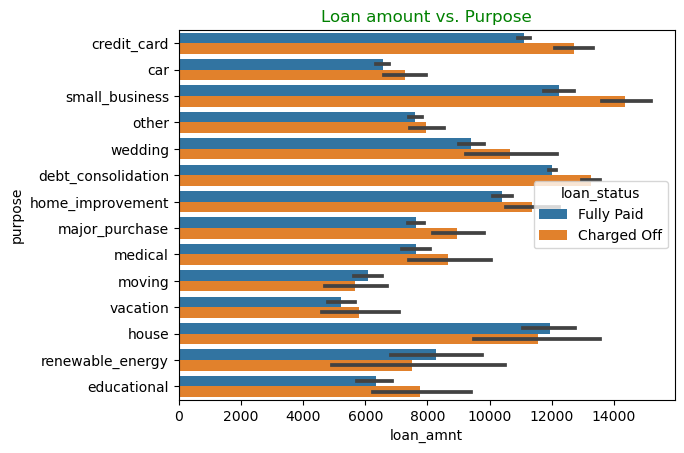

In [106]:
#loan amount vs purpose
plt.title("Loan amount vs. Purpose", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.barplot(data=loan,x='loan_amnt',y='purpose',hue='loan_status')

#Applicant taking loan For small business is likely a defaulter

<Axes: title={'center': 'Loan_amount vs. Home ownership'}, xlabel='loan_amnt', ylabel='home_ownership'>

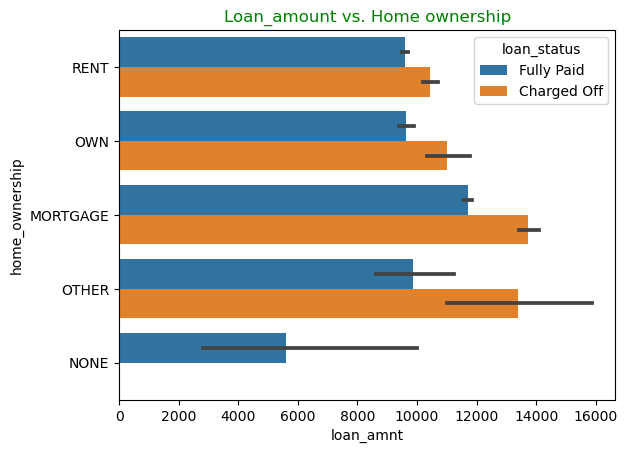

In [107]:
#loan amount vs home_ownership
plt.title("Loan_amount vs. Home ownership", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
sns.barplot(data=loan,x='loan_amnt',y='home_ownership',hue='loan_status')
#A large number of applicant taking loan for mortgage are defaulters.

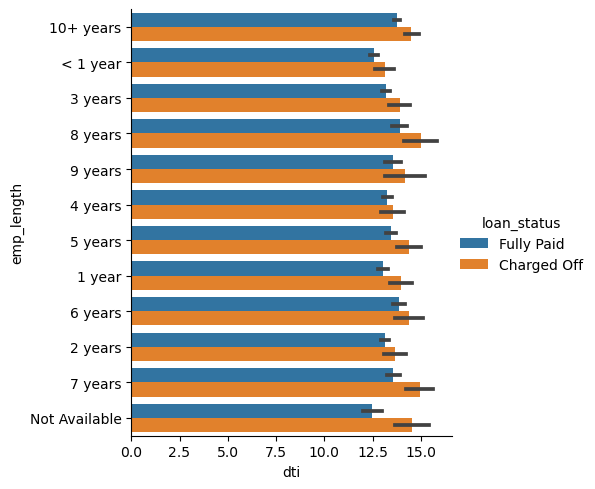

In [108]:
#dti vs. emp_length
sns.catplot(data=loan,y='emp_length', x='dti',hue='loan_status',kind='bar')
plt.show()
#applicants having 5+ years have more dti hence resulting into the possibility of a defaulter.

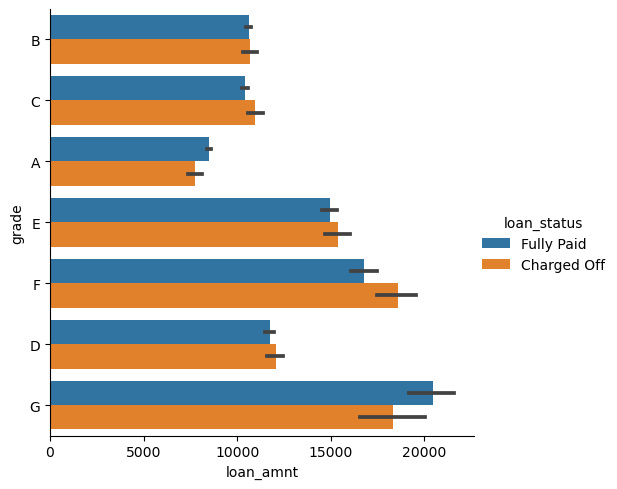

In [109]:
#loan amount vs grade
sns.catplot(data=loan,x='loan_amnt', y='grade',kind='bar',hue='loan_status')

#Grade E, F and G has hugh number of defaulters.

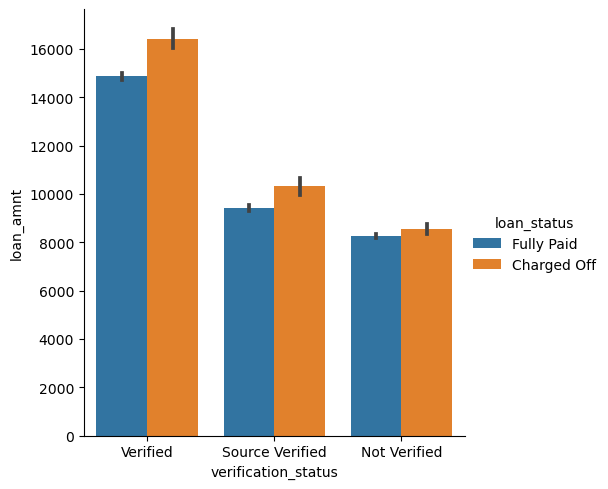

In [110]:
#loan amount vs. verification
sns.catplot(data=loan,x='verification_status', y='loan_amnt',kind='bar',hue='loan_status')

<Axes: xlabel='loan_status', ylabel='pub_rec_bankruptcies'>

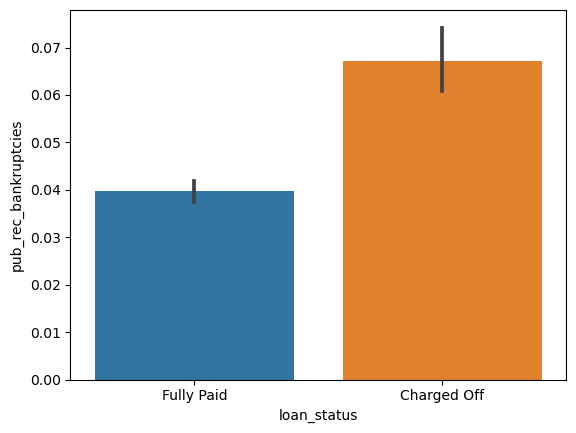

In [112]:
#loan status vs. pub_rec_bankruptcies
sns.barplot(data=loan,x='loan_status',y='pub_rec_bankruptcies')

#As shown, pub_rec_bankruptcies is affecting the number of loan defaulters.

In [111]:
loan.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int32
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
open_acc                         int64
pub_rec                          int64
total_acc                        int64
pub_rec_bankruptcies           float64
issue_month                      int64
issue_year                       int64
bins_int_rate                 category
dtype: object

### Main insights

**Univariate Analysis**

1. A significant number of borrowers have taken loan in the range of 5k-10k
2. Most borrowers have taken loan for 36 months
3. A significant number of borrowers have taken the loan with the interest rate from 9-15%
4. Most of th borrowers opted for the minimum amount for monthly installment
5. Most of the loan are in Grade A and Grade B, hence not risky Borrowers having 10+ years of experience have taken more loan   than the others. However, a significant number of borrowers #have less than 1 years of experience, hence, the bank may pay attention while issuing loan to them.
6. A significant number of borrowers are on Rent or on Mortgage
7. A sgnificant number of borrowers have opted loan for Debt consolidation.
8. Significant no. of loans are not verified.
9. Most of the borrowers have no bankruptcies
10.The count of issuing loans is increasing with the each year.
11. More loans were issued in the month of dec
12. Loans to most of the defaulters was issued in the month of december
13. A large number of borrowers has high debt as compared to their income and may struggle to pay the installment
14. Most of the borrowers has 0 derogatory public record
15. Most of the borrowers fall in the range of 5-15 open credit lines..

**Bivariate Analysis Insights**

1. California has the most number of defaulted one's.
2. Thee borrowers having higher loan amount has higher chances of being a defaulter
3. Borrowers applying for 60 months loan have higher chances of being a defaulter
4. Highly number of defaulter had annual income approx. from 35k to 55k. High salary leads to less chances of being a defaulter
5. The chances of being a default increase with the higher dti
6. Emp length having 10+ is offered more loan
7. Applicant with emp_length of 10+ years have a high chance of being a defaulter.
8. Higher interest rate results in higher number of defaulter
9. Applicant taking loan For small business is likely a defaulter
10. A large number of applicant taking loan for mortgage are defaulters.
11. Applicants having 5+ years have more dti hence resulting into the possibility of a defaulter.
12. Grade E, F and G has hugh number of defaulters.